In [1104]:
from embcomp.test_cases.confusion import case1, case2, case3, case4, case5, plot_confusion
from embcomp.test_cases.utils import plot

### Confusion 1

- Case: 5 equal sized groups, well separated
- Expected: no confusion

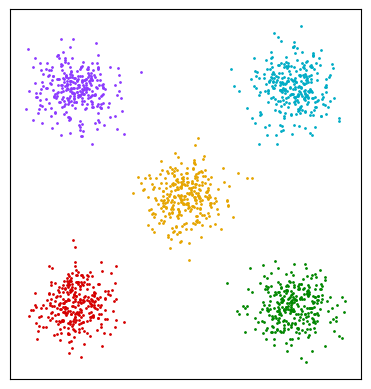

In [1105]:
plot(case1())

### Confusion 2

- Case: 5 equal sized groups, 2 mixed
- Expected: confusion with last two groups

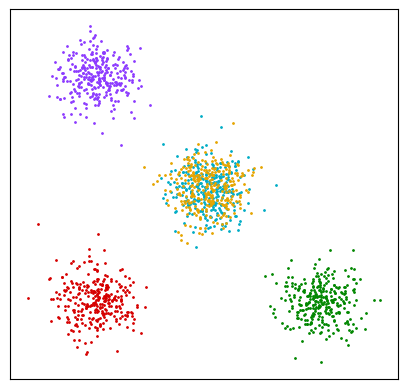

In [1106]:
plot(case2())

### Confusion 3

- Case: 5 groups of various sizes, small group intermixed with larger
- Expected: smaller group should be confused with larger mixed group

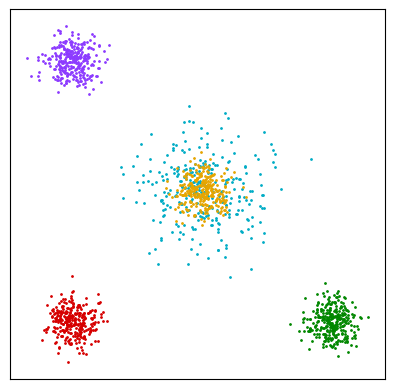

In [1107]:
plot(case3())

### Confusion 4

- Case: 5 groups of various sizes, small group intermixed with larger
- Expected: smaller group should be confused with larger mixed group

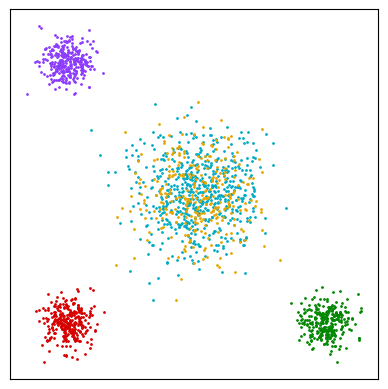

In [1108]:
plot(case4())

### Confusion 5

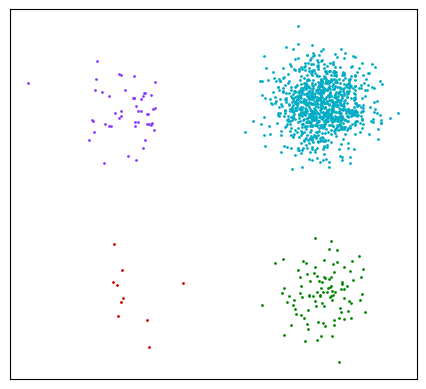

In [1109]:
plot(case5())

## Testing


In [1113]:
# test harness
def run(metrics):
    for case in [case1, case2, case3, case4, case5]:
        plot_confusion(case(), metrics)

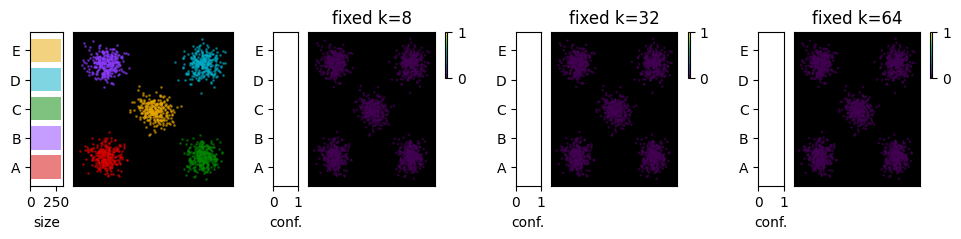

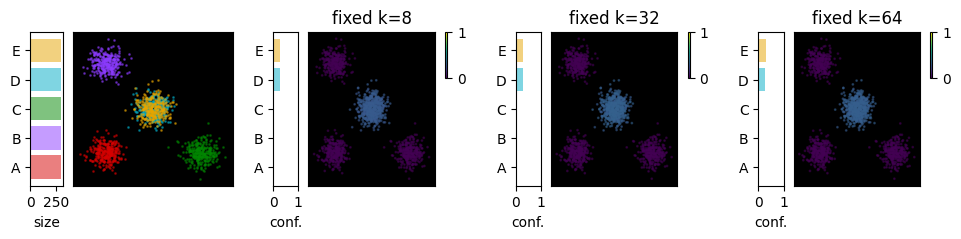

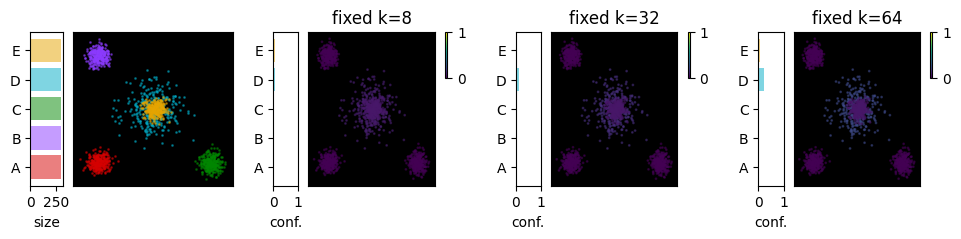

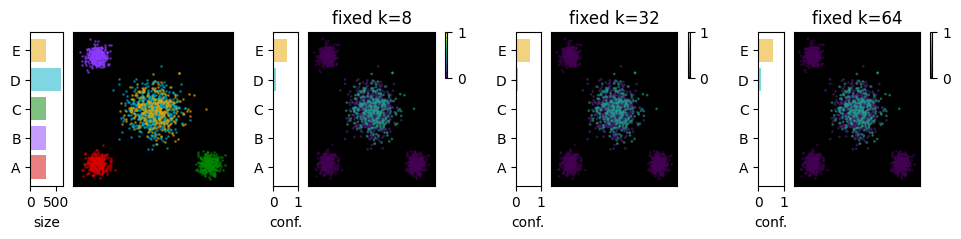

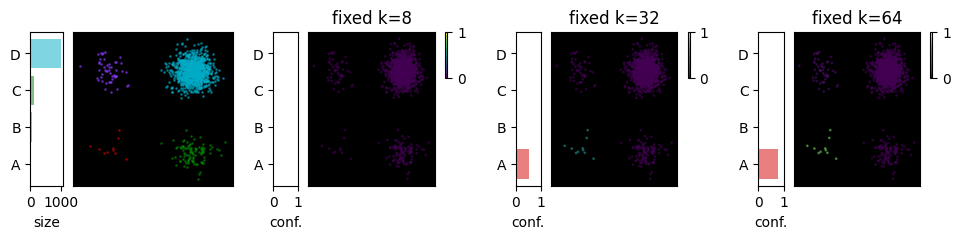

In [1115]:
def fixed_k(data: pd.DataFrame, k):
    nn = NearestNeighbors(n_neighbors=k).fit(data[["x", "y"]])
    knn_indices = nn.kneighbors(return_distance=False)
    counts = ec.metrics.count_neighbor_labels(knn_indices, data.label)
    index = pd.Series(data.label, name="label", dtype="category")
    df = pd.DataFrame(counts, index=index).groupby("label").sum()
    df.columns = index.cat.categories
    return df


run(
    metrics=[
        ("fixed k=8", functools.partial(fixed_k, k=8)),
        ("fixed k=32", functools.partial(fixed_k, k=32)),
        ("fixed k=64", functools.partial(fixed_k, k=64)),
    ],
)